# **Step 1: Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import yellowbrick
import warnings


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances

from matplotlib.cm import rainbow

warnings.filterwarnings("ignore")

# **Step 2: Importing dataset**

In [2]:
df = pd.read_csv("/content/heart dataset.csv")

# **Step 3: Understanding the dataset**

### ***3.1  Printing 1st five rows of dataset***


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### ***3.2  Shape of dataset***

In [4]:
df.shape

(303, 14)

### ***3.3  Describing attributes***

In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl"," resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(df.columns[i]+":\t\t"+info[i])

age:		age
sex:		1: male, 0: female
cp:		chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trtbps:		resting blood pressure
chol:		 serum cholestoral in mg/dl
fbs:		fasting blood sugar > 120 mg/dl
restecg:		 resting electrocardiographic results (values 0,1,2)
thalachh:		 maximum heart rate achieved
exng:		exercise induced angina
oldpeak:		oldpeak = ST depression induced by exercise relative to rest
slp:		the slope of the peak exercise ST segment
caa:		number of major vessels (0-3) colored by flourosopy
thall:		thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


### ***3.4  Count of each attribute***



In [6]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["count"]).transpose()

,count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


### ***3.5  Identifying continous and categorical attributes***

In [7]:
categorical = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
continous = ["age","trtbps","chol","thalachh","oldpeak"]
target = ["output"]
print("The categorial columns are : ", categorical)
print("The continuous columns are : ", continous)
print("The target variable is :  ", target)

The categorial columns are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous columns are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


### ***3.6  Summary Statistics for continous attributes***

In [8]:
df[continous].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### ***3.7  Checking for any missing values and datatypes***

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


It's observed that there are no missing values. 
But the data type of categorical variables isn't correct. So we need to set their data type.

### ***3.8  Setting the data type of categorical attributes***

In [10]:
df[categorical] = df[categorical].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    object 
 11  caa       303 non-null    object 
 12  thall     303 non-null    object 
 13  output    303 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


# **Step 4: Exploratory Data Analysis**

### ***4.1  Exploring categorical attributes using Count plot***

Text(0, 0.5, '')

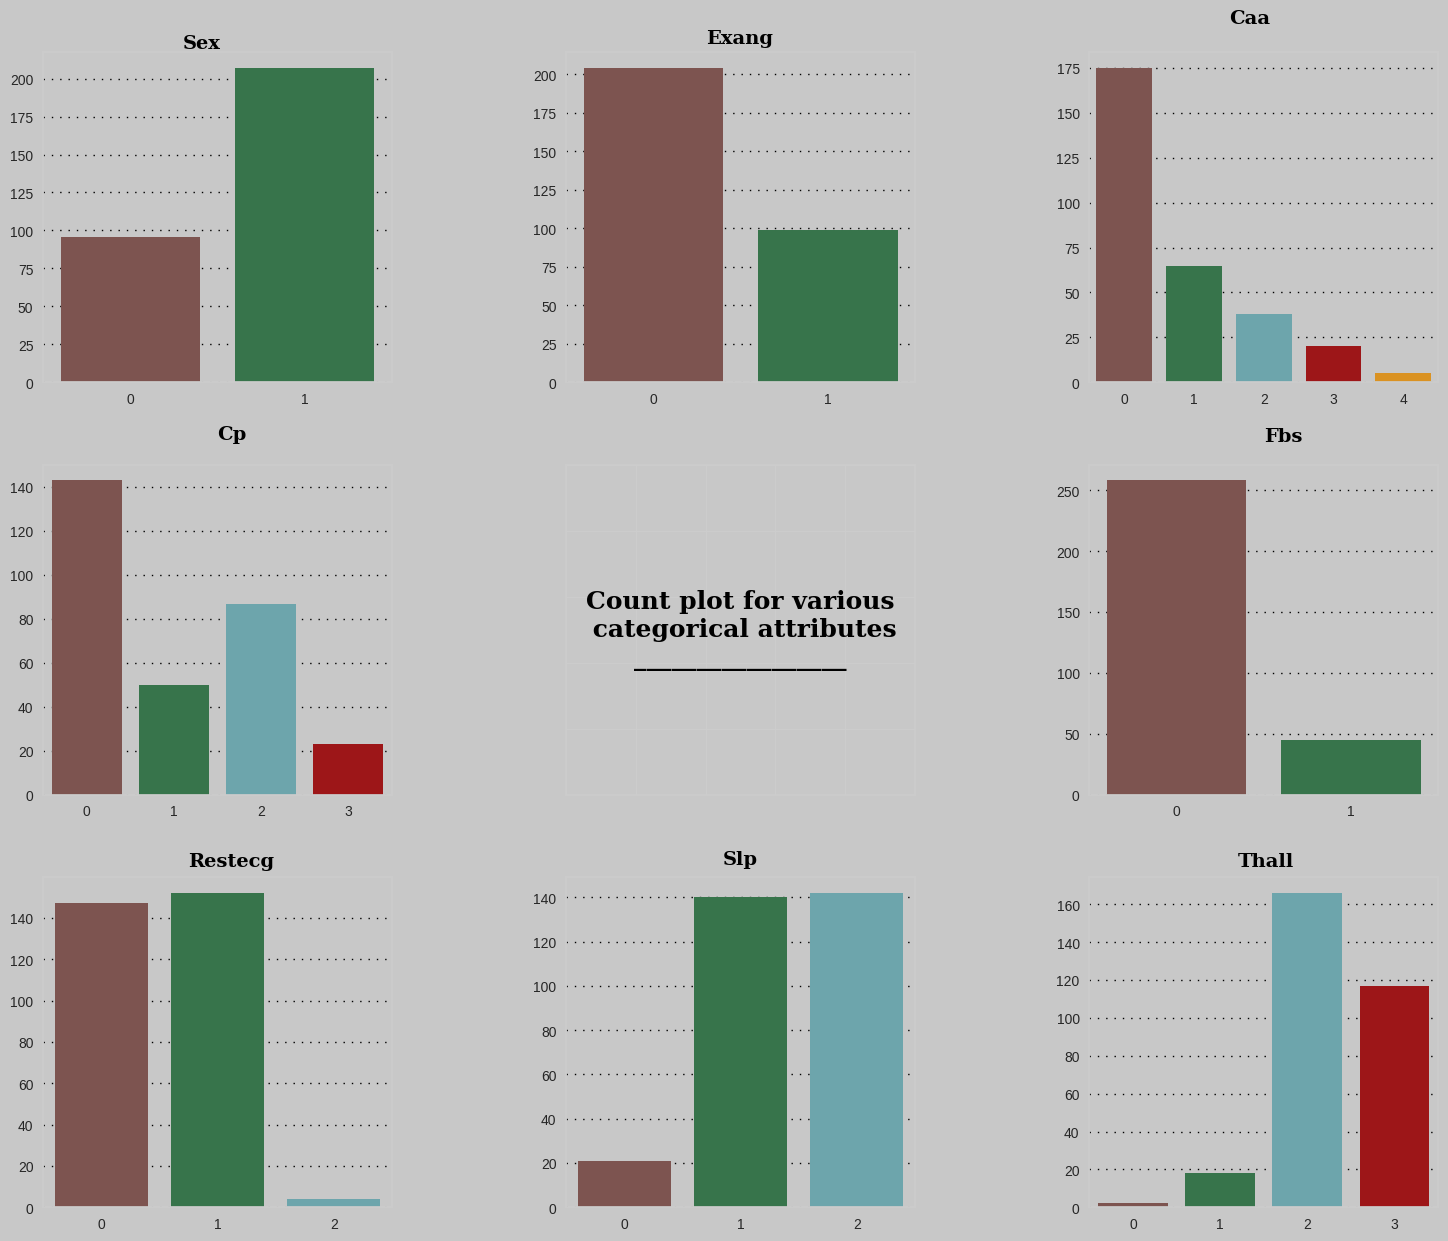

In [11]:
fig = plt.figure(figsize=(18,15))        #creating an empty figure
grids = fig.add_gridspec(3,3)            #adding grids/coordinates
grids.update(wspace=0.5, hspace=0.25)
axis0 = fig.add_subplot(grids[0,0])      #at each coordinate there is a sub plot/graph
axis1 = fig.add_subplot(grids[0,1])
axis2 = fig.add_subplot(grids[0,2])
axis3 = fig.add_subplot(grids[1,0])
axis4 = fig.add_subplot(grids[1,1])
axis5 = fig.add_subplot(grids[1,2])
axis6 = fig.add_subplot(grids[2,0])
axis7 = fig.add_subplot(grids[2,1])
axis8 = fig.add_subplot(grids[2,2])

bg_color = "#C8C8C8"
color_palette = ["#854e48","#2d7e48","#62adb6","#b30002","#f99803"]
fig.patch.set_facecolor(bg_color)       #setting background color for the whole figure
axis0.set_facecolor(bg_color)           #setting background color for the sub plots
axis1.set_facecolor(bg_color) 
axis2.set_facecolor(bg_color) 
axis3.set_facecolor(bg_color) 
axis4.set_facecolor(bg_color) 
axis5.set_facecolor(bg_color) 
axis6.set_facecolor(bg_color) 
axis7.set_facecolor(bg_color) 
axis8.set_facecolor(bg_color) 

# Title of the plot
axis4.set_xticklabels([])
axis4.set_yticklabels([])
axis4.text(0.5,0.5, 'Count plot for various\n categorical attributes\n_________________', horizontalalignment='center', verticalalignment='center',
         fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")

# Sex count
axis0.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis0,data=df,x='sex',palette=color_palette)
axis0.set_xlabel("")
axis0.set_ylabel("")

# Exng count
axis1.text(0.3, 220, 'Exang', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis1,data=df,x='exng',palette=color_palette)
axis1.set_xlabel("")
axis1.set_ylabel("")

# Caa count
axis2.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis2,data=df,x='caa',palette=color_palette)
axis2.set_xlabel("")
axis2.set_ylabel("")

# Cp count
axis3.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis3,data=df,x='cp',palette=color_palette)
axis3.set_xlabel("")
axis3.set_ylabel("")

# Fbs count
axis5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis5,data=df,x='fbs',palette=color_palette)
axis5.set_xlabel("")
axis5.set_ylabel("")

# Restecg count
axis6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis6,data=df,x='restecg',palette=color_palette)
axis6.set_xlabel("")
axis6.set_ylabel("")

# Slp count
axis7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis7,data=df,x='slp',palette=color_palette)
axis7.set_xlabel("")
axis7.set_ylabel("")

# Thall count
axis8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis8,data=df,x='thall',palette=color_palette)
axis8.set_xlabel("")
axis8.set_ylabel("")

### ***4.2  Exploring continous attributes using Histogram***

Text(0, 0.5, '')

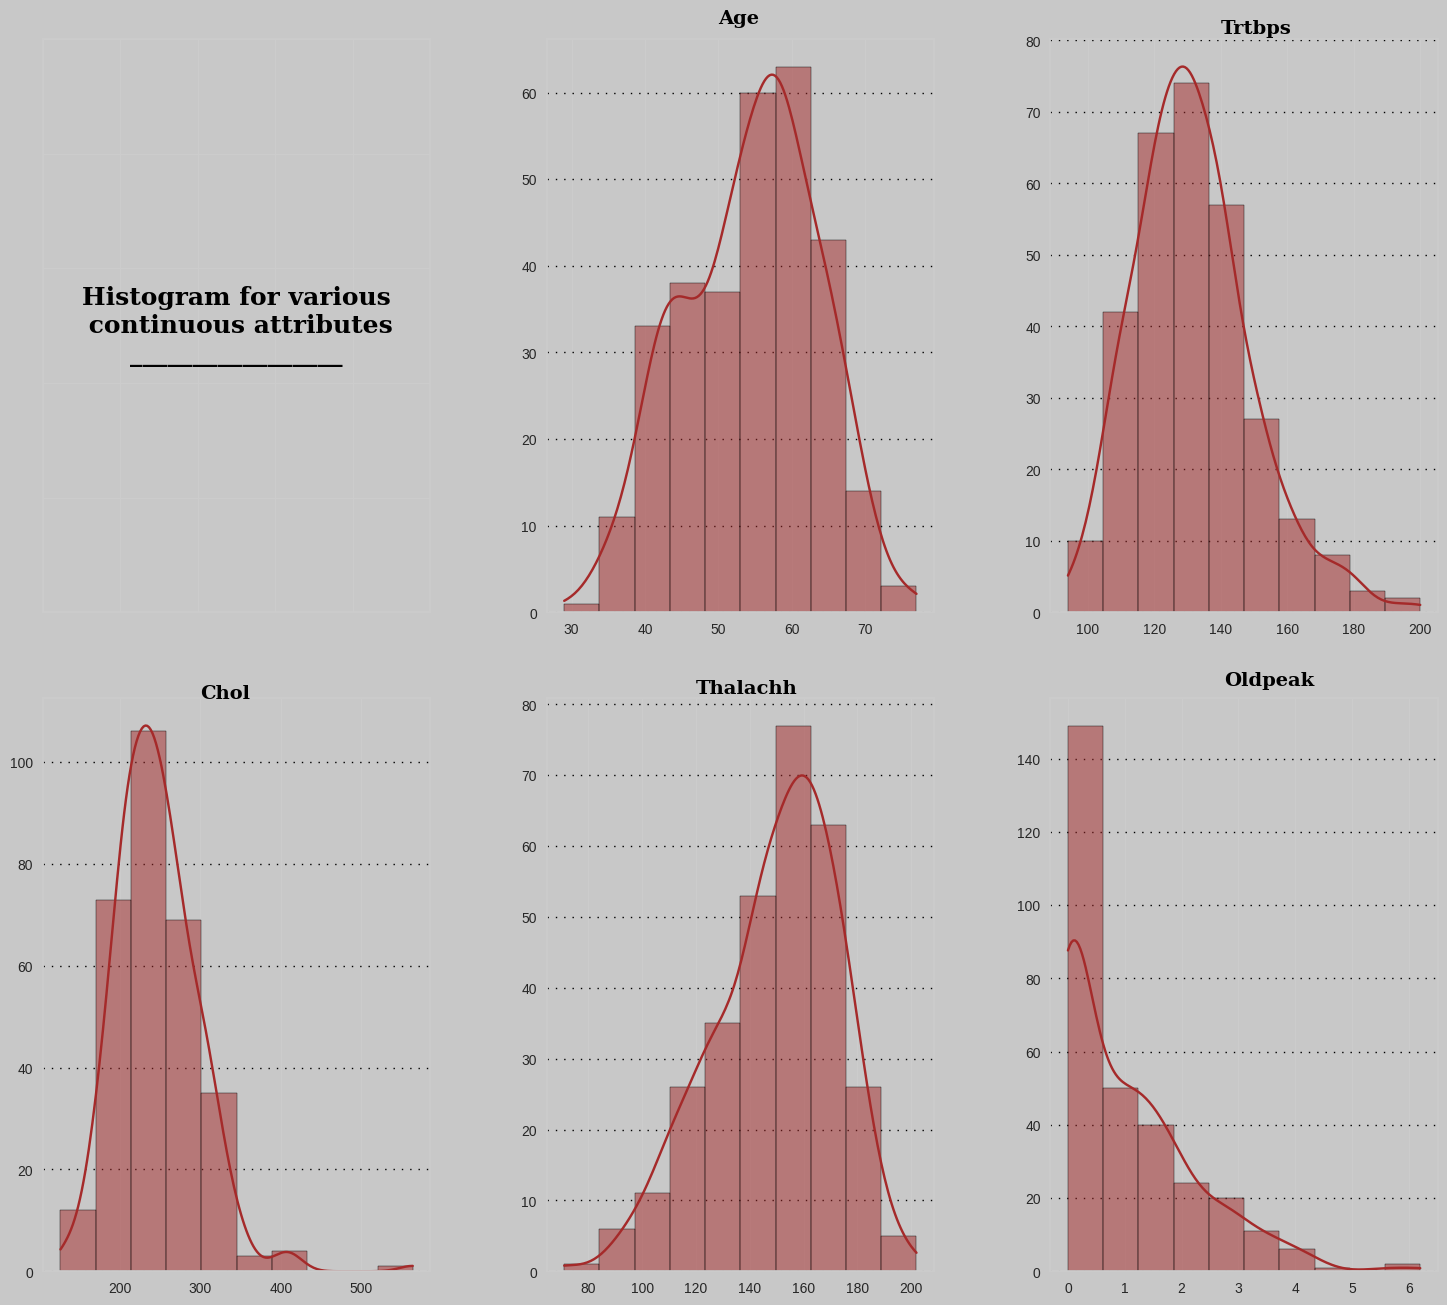

In [12]:
fig = plt.figure(figsize=(18,16))
grids = fig.add_gridspec(2,3)
grids.update(wspace=0.3, hspace=0.15)
axis0 = fig.add_subplot(grids[0,0])
axis1 = fig.add_subplot(grids[0,1])
axis2 = fig.add_subplot(grids[0,2])
axis3 = fig.add_subplot(grids[1,0])
axis4 = fig.add_subplot(grids[1,1])
axis5 = fig.add_subplot(grids[1,2])

bg_color = "#C8C8C8"
color_palette = ["#854e48","#2d7e48","#62adb6","#b30002","#f99803"]
fig.patch.set_facecolor(bg_color) 
axis0.set_facecolor(bg_color) 
axis1.set_facecolor(bg_color) 
axis2.set_facecolor(bg_color) 
axis3.set_facecolor(bg_color) 
axis4.set_facecolor(bg_color) 
axis5.set_facecolor(bg_color) 

# Title of the plot
axis0.set_xticklabels([])
axis0.set_yticklabels([])
axis0.text(0.5,0.5,'Histogram for various\n continuous attributes\n_________________', horizontalalignment='center', verticalalignment='center',
         fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")

# Age 
axis1.text(50.0, 68, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=axis1, data=df, x='age', color='brown', bins=10, kde=True)
axis1.set_xlabel("")
axis1.set_ylabel("")

# Trtbps 
axis2.text(140.0, 81, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=axis2, data=df, x='trtbps', color='brown', bins=10, kde=True)
axis2.set_xlabel("")
axis2.set_ylabel("")

# Chol 
axis3.text(300.0, 112.5, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=axis3, data=df, x='chol', color='brown', bins=10, kde=True)
axis3.set_xlabel("")
axis3.set_ylabel("")

# Thalachh 
axis4.text(120, 81.5, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=axis4, data=df, x='thalachh', color='brown', bins=10, kde=True)
axis4.set_xlabel("")
axis4.set_ylabel("")

# oldpeak 
axis5.text(2.75, 160, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
axis5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=axis5, data=df, x='oldpeak', color='brown', bins=10, kde=True)
axis5.set_xlabel("")
axis5.set_ylabel("")

### ***4.3  Analyzing the count of target using Pie chart***

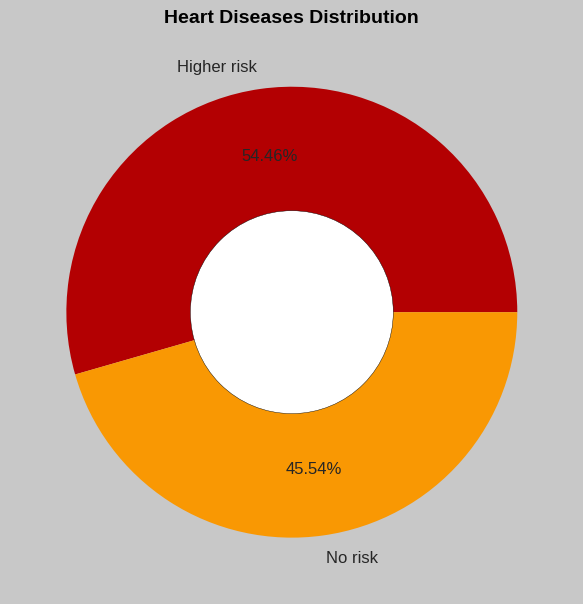

In [13]:
color = ["#b30002","#f99803"]
labels=['Higher risk', 'No risk']
order=df['output'].value_counts().index

fig= plt.figure(figsize=(16,8))
fig.patch.set_facecolor(bg_color)
plt.subplot(1, 2, 1)
plt.title('Heart Diseases Distribution', fontweight='bold', fontsize=14, fontfamily='sans-serif', color="#000000")
plt.pie(df['output'].value_counts(), labels=labels, colors=color, autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor="#000000")
plt.gcf().gca().add_artist(centre)

### ***4.4  Exploring the distribution of continous attributes with respect to target variable using Distribution Plot***

Text(0, 0.5, '')

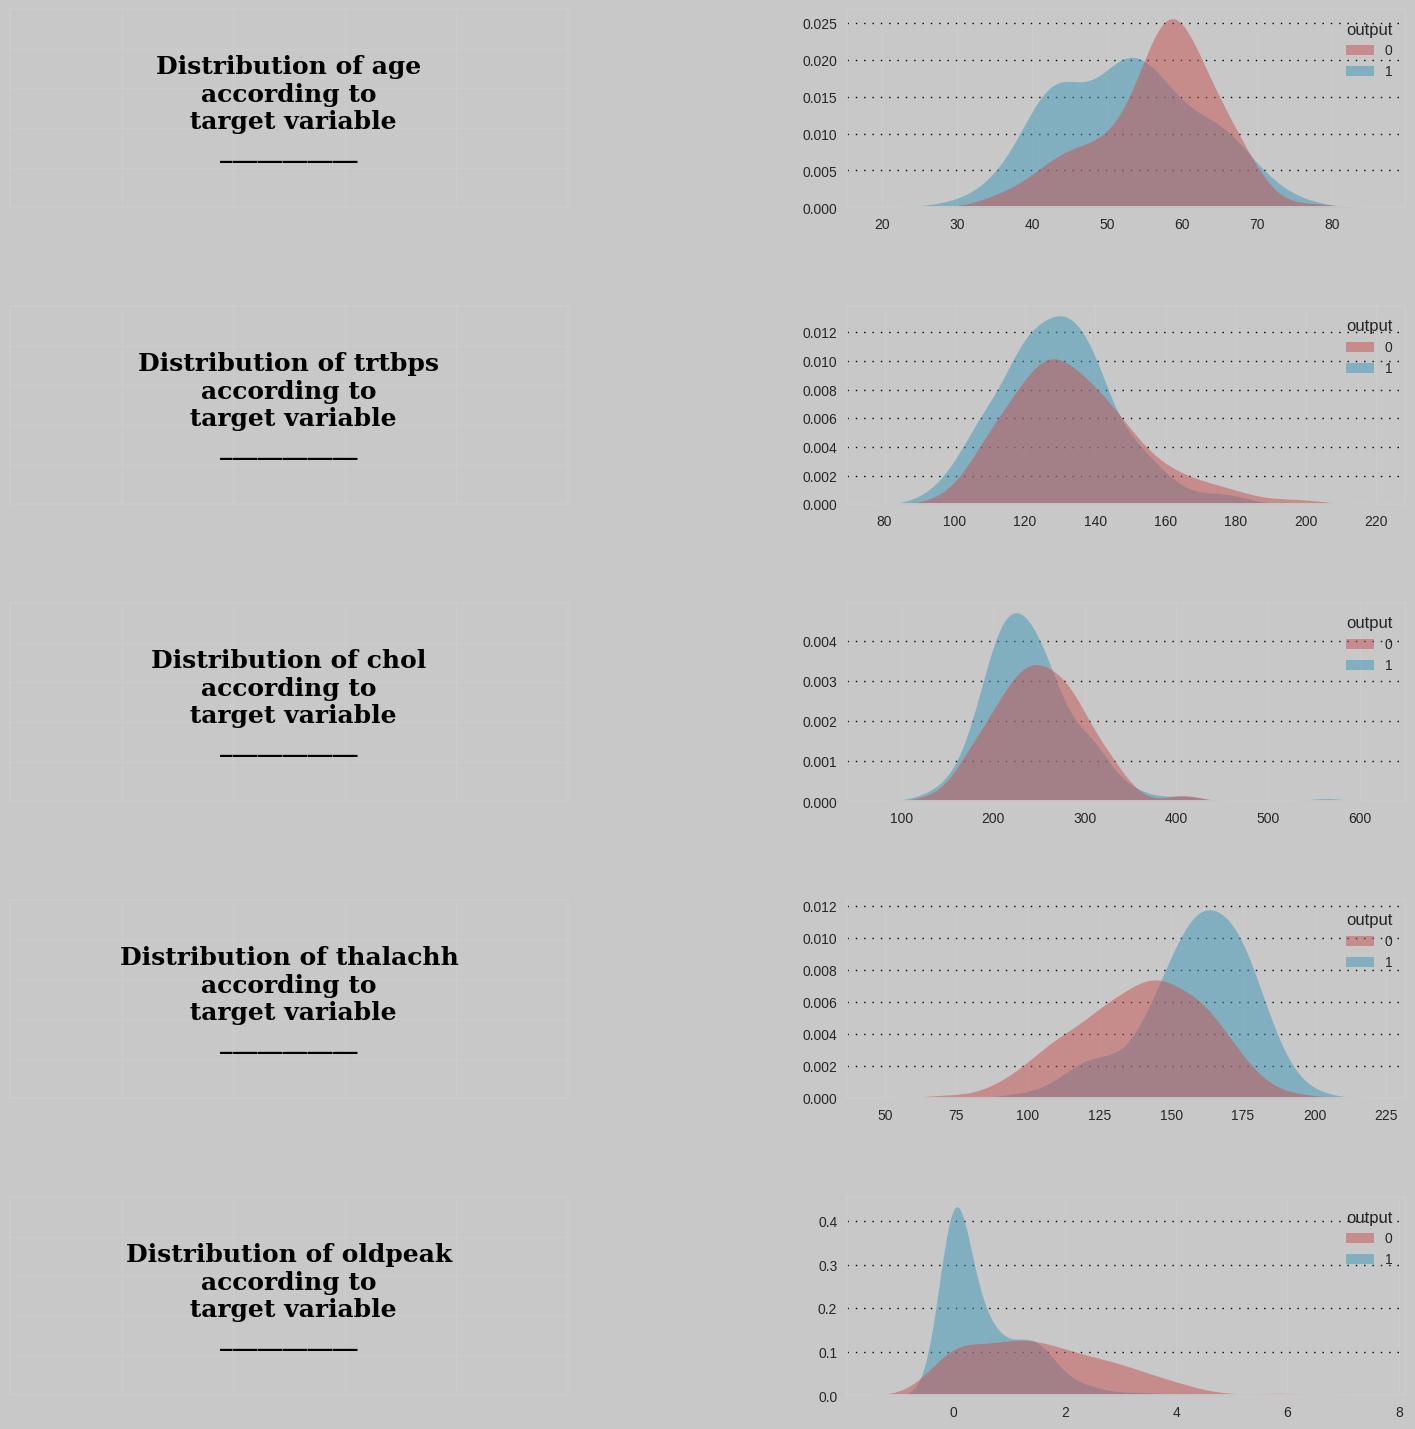

In [14]:
fig = plt.figure(figsize=(18,18))
grids = fig.add_gridspec(5,2)
grids.update(wspace=0.5, hspace=0.5)
axis0 = fig.add_subplot(grids[0,0])
axis1 = fig.add_subplot(grids[0,1])
axis2 = fig.add_subplot(grids[1,0])
axis3 = fig.add_subplot(grids[1,1])
axis4 = fig.add_subplot(grids[2,0])
axis5 = fig.add_subplot(grids[2,1])
axis6 = fig.add_subplot(grids[3,0])
axis7 = fig.add_subplot(grids[3,1])
axis8 = fig.add_subplot(grids[4,0])
axis9 = fig.add_subplot(grids[4,1])

bg_color = "#C8C8C8"
color_palette = ["#854e48","#2d7e48","#62adb6","#b30002","#f99803"]
fig.patch.set_facecolor(bg_color)     #setting background color for the whole figure
axis0.set_facecolor(bg_color)         #setting background color for the sub plots
axis1.set_facecolor(bg_color) 
axis2.set_facecolor(bg_color) 
axis3.set_facecolor(bg_color) 
axis4.set_facecolor(bg_color) 
axis5.set_facecolor(bg_color) 
axis6.set_facecolor(bg_color) 
axis7.set_facecolor(bg_color) 
axis8.set_facecolor(bg_color) 
axis9.set_facecolor(bg_color)

# Age title
axis0.set_xticklabels([])
axis0.set_yticklabels([])
axis0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________", horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 18, fontweight='bold', fontfamily='serif', color='#000000')

# Age
axis1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=axis1, data=df, x='age',hue="output", fill=True, palette=["#C55151","#3E98B8"], alpha=.5, linewidth=0)
axis1.set_xlabel("")
axis1.set_ylabel("")

# TrTbps title
axis2.set_xticklabels([])
axis2.set_yticklabels([])
axis2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________", horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 18, fontweight='bold', fontfamily='serif', color='#000000')

# TrTbps
axis3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=axis3, data=df, x='trtbps',hue="output", fill=True,palette=["#C55151","#3E98B8"], alpha=.5, linewidth=0)
axis3.set_xlabel("")
axis3.set_ylabel("")

# Chol title
axis4.set_xticklabels([])
axis4.set_yticklabels([])
axis4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________", horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 18, fontweight='bold', fontfamily='serif', color='#000000')

# Chol
axis5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=axis5, data=df, x='chol',hue="output", fill=True,palette=["#C55151","#3E98B8"], alpha=.5, linewidth=0)
axis5.set_xlabel("")
axis5.set_ylabel("")

# Thalachh title
axis6.set_xticklabels([])
axis6.set_yticklabels([])
axis6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________", horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 18, fontweight='bold', fontfamily='serif', color='#000000')

# Thalachh
axis7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=axis7, data=df, x='thalachh',hue="output", fill=True,palette=["#C55151","#3E98B8"], alpha=.5, linewidth=0)
axis7.set_xlabel("")
axis7.set_ylabel("")

# Oldpeak title
axis8.set_xticklabels([])
axis8.set_yticklabels([])
axis8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________", horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 18, fontweight='bold', fontfamily='serif', color='#000000')

# Oldpeak
axis9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=axis9, data=df, x='oldpeak',hue="output", fill=True,palette=["#C55151","#3E98B8"], alpha=.5, linewidth=0)
axis9.set_xlabel("")
axis9.set_ylabel("")

### ***4.4  Exploring the distribution of some important categorical attributes with respect to target variable using different plots***

Text(0, 0.5, 'target')

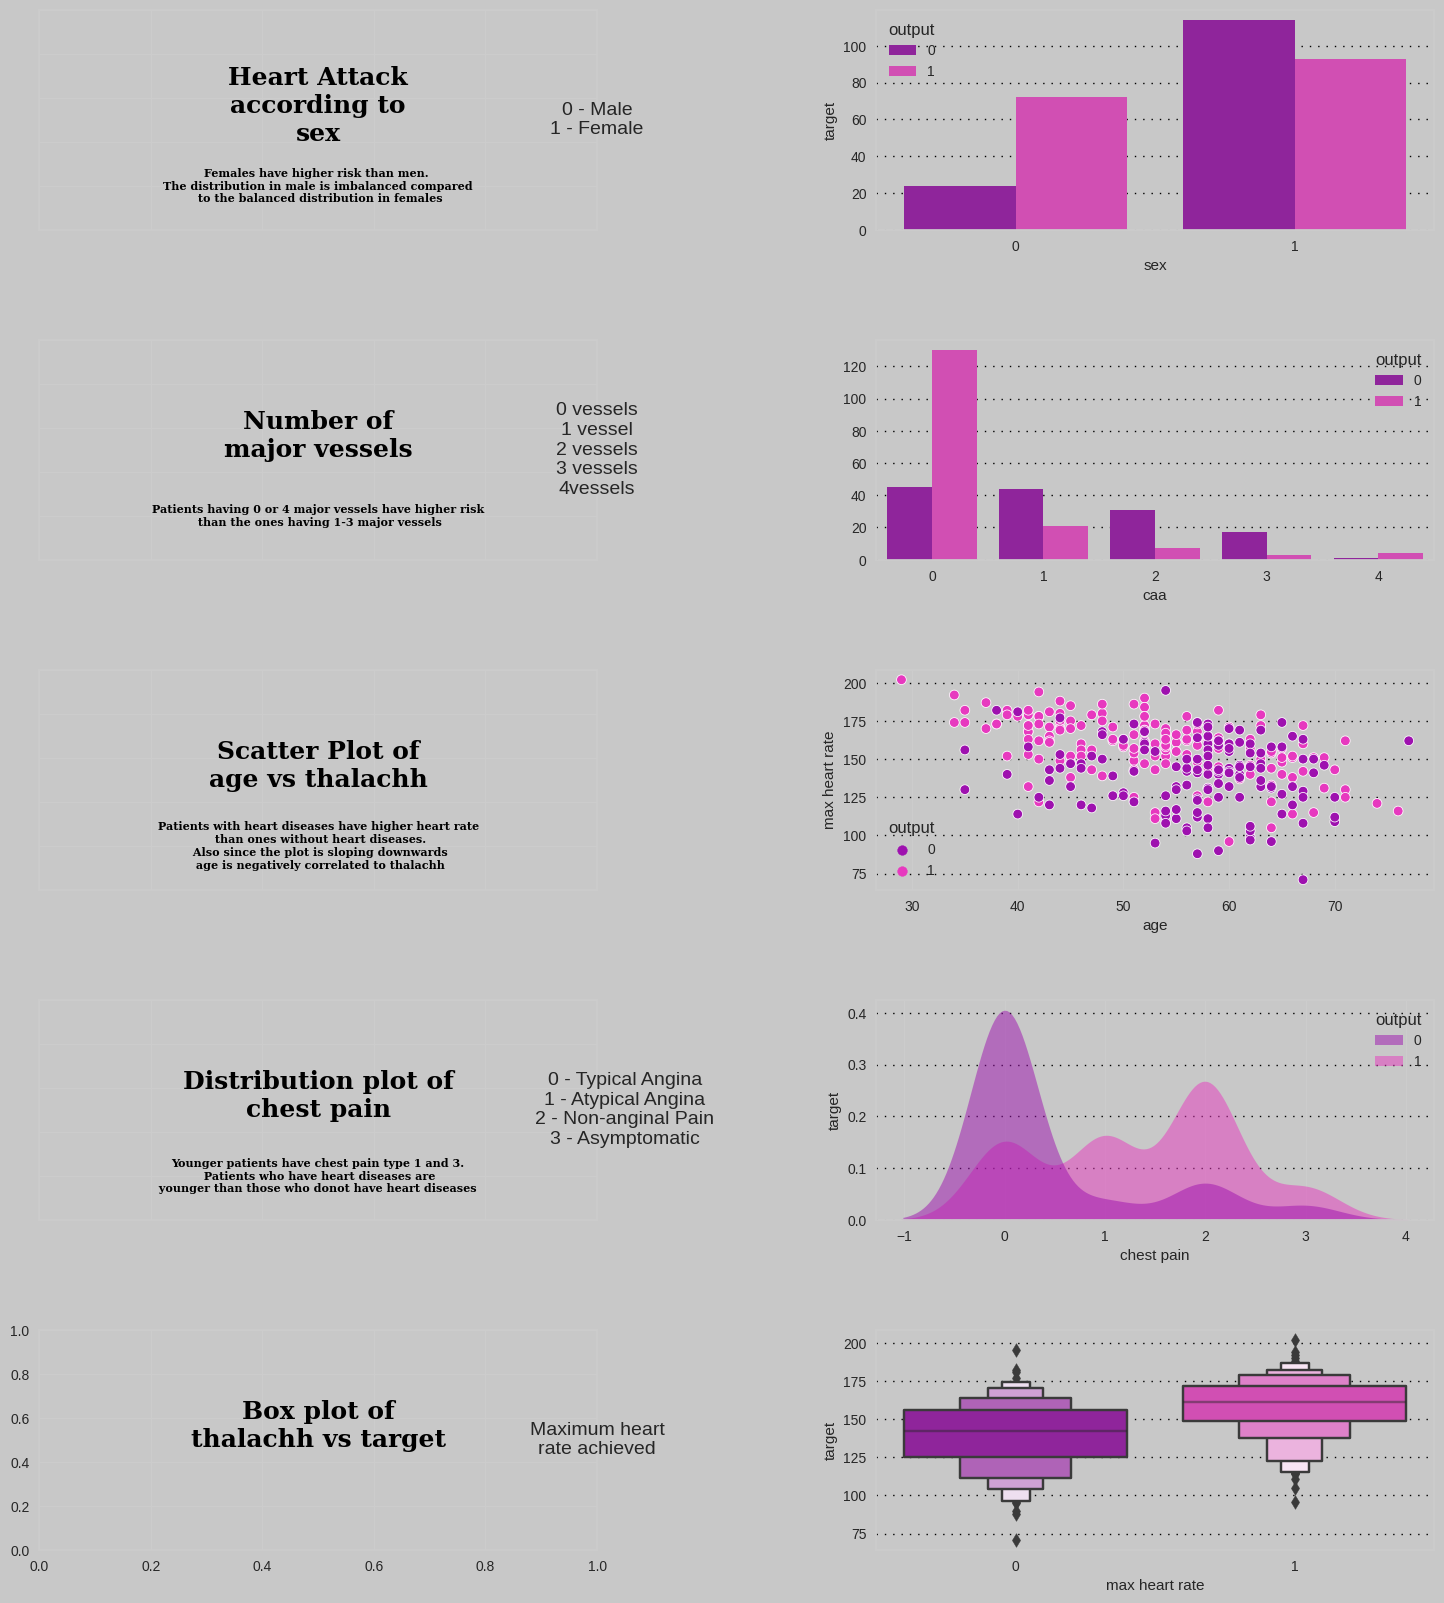

In [15]:
fig = plt.figure(figsize=(18,20))
grids = fig.add_gridspec(5,2)
grids.update(wspace=0.5, hspace=0.5)
axis0 = fig.add_subplot(grids[0,0])
axis1 = fig.add_subplot(grids[0,1])
axis2 = fig.add_subplot(grids[1,0])
axis3 = fig.add_subplot(grids[1,1])
axis4 = fig.add_subplot(grids[2,0])
axis5 = fig.add_subplot(grids[2,1])
axis6 = fig.add_subplot(grids[3,0])
axis7 = fig.add_subplot(grids[3,1])
axis8 = fig.add_subplot(grids[4,0])
axis9 = fig.add_subplot(grids[4,1])

bg_color = "#C8C8C8"
color_palette = ["#854e48","#2d7e48","#62adb6","#b30002","#f99803"]
fig.patch.set_facecolor(bg_color)     #setting background color for the whole figure
axis0.set_facecolor(bg_color)         #setting background color for the sub plots
axis1.set_facecolor(bg_color) 
axis2.set_facecolor(bg_color) 
axis3.set_facecolor(bg_color) 
axis4.set_facecolor(bg_color) 
axis5.set_facecolor(bg_color) 
axis6.set_facecolor(bg_color) 
axis7.set_facecolor(bg_color) 
axis8.set_facecolor(bg_color)
axis9.set_facecolor(bg_color)


# Sex title
axis0.set_xticklabels([])
axis0.set_yticklabels([])
axis0.text(0.5,0.5,"Heart Attack\naccording to\nsex\n", horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18,
        fontweight='bold', fontfamily='serif', color='#000000')
axis0.text(0.5,0.2,"Females have higher risk than men. \nThe distribution in male is imbalanced compared\n to the balanced distribution in females", horizontalalignment = 'center', verticalalignment = 'center', fontsize =8, fontweight='bold', fontfamily='serif', color='#000000')
axis0.text(1,.5,"0 - Male\n1 - Female", horizontalalignment = 'center', verticalalignment = 'center', fontsize = 14)

# Sex vs target
axis1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis1, data=df, x='sex', palette=["#9E11AF","#E739BF"], hue='output')
axis1.set_xlabel("sex")
axis1.set_ylabel("target")


# Caa title
axis2.set_xticklabels([])
axis2.set_yticklabels([])
axis2.text(0.5,0.5,"Number of\nmajor vessels\n", horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18,
        fontweight='bold', fontfamily='serif', color='#000000')
axis2.text(0.5,0.2,"Patients having 0 or 4 major vessels have higher risk\n than the ones having 1-3 major vessels", horizontalalignment = 'center', verticalalignment = 'center', fontsize =8, fontweight='bold', fontfamily='serif', color='#000000')
axis2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels", horizontalalignment = 'center', verticalalignment = 'center', fontsize = 14)

# Caa vs target
axis3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=axis3, data=df, x='caa', palette=["#9E11AF","#E739BF"], hue='output')
axis3.set_ylabel("")


#age vs thalachh title
axis4.set_xticklabels([])
axis4.set_yticklabels([])
axis4.text(0.5,0.5,"Scatter Plot of\nage vs thalachh\n", horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18,
        fontweight='bold', fontfamily='serif', color='#000000')
axis4.text(0.5,0.2,"Patients with heart diseases have higher heart rate\n than ones without heart diseases.\n Also since the plot is sloping downwards\n age is negatively correlated to thalachh", horizontalalignment = 'center', verticalalignment = 'center', fontsize =8, fontweight='bold', fontfamily='serif', color='#000000')

#age vs thalachh 
axis5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.scatterplot(ax=axis5, data=df,x='age',y='thalachh', hue='output', palette=["#9E11AF","#E739BF"])
axis5.set_xlabel("age")
axis5.set_ylabel("max heart rate")


# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
axis6.set_xticklabels([])
axis6.set_yticklabels([])
axis6.text(0.5,0.5,"Distribution plot of\nchest pain\n", horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18, fontweight='bold',
        fontfamily='serif', color='#000000')
axis6.text(0.5,0.2,"Younger patients have chest pain type 1 and 3.\n Patients who have heart diseases are\n younger than those who donot have heart diseases ", horizontalalignment = 'center', verticalalignment = 'center', fontsize =8, fontweight='bold', fontfamily='serif', color='#000000')
axis6.text(1.05,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic", horizontalalignment = 'center', verticalalignment = 'center',
        fontsize = 14)

# Cp
axis7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=axis7, data=df, x='cp',hue="output", fill=True,palette=["#9E11AF","#E739BF"], alpha=.5, linewidth=0)
axis7.set_xlabel("chest pain")
axis7.set_ylabel("target")


#Thalachh title
axis8.text(0.5,0.5,"Box plot of\nthalachh vs target\n", horizontalalignment = 'center', verticalalignment = 'center', fontsize = 18,
        fontweight='bold', fontfamily='serif', color='#000000')
axis8.text(1,.5,"Maximum heart\nrate achieved", horizontalalignment = 'center', verticalalignment = 'center', fontsize = 14)

# Thalachh
axis9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=axis9, data=df,x='output',y='thalachh',palette=["#9E11AF","#E739BF"])
axis9.set_xlabel("max heart rate")
axis9.set_ylabel("target")

# **Step 5: Data Preprocessing**



### ***5.1  Feature Selection using Pearson's Correlation Matrix***

In [16]:
df_corr = df[continous].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


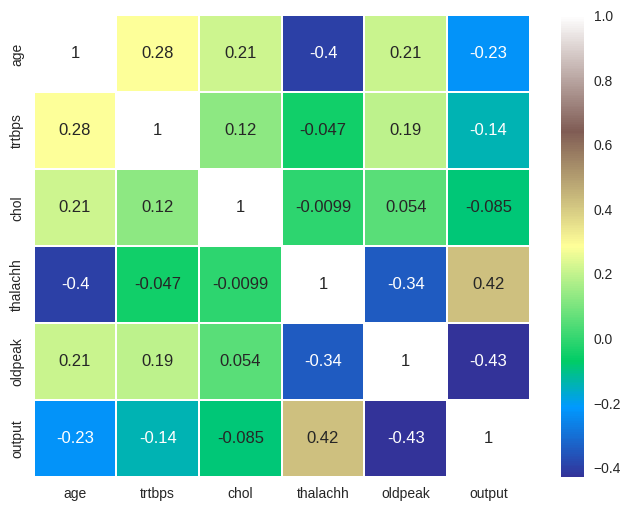

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Here it is observed that oldpeak, cholestrol level and resting blood pressure have a positive correlation with age. Age is negatively correlated to thalachh as seen in the previous scatter plot. It is also observed that thalachh has a very correlation with the output as it helps to determine whether a patient is at risk or not. We need to remove the attributes that are highly correlated to each other in order to reduce dimentionality as using one of them is enough. It also helps to avoid overfitting.

### ***5.2  Feature Selection using Chi-squared method***

In [18]:
w = df.drop(['output'], axis=1)
z = df['output'] 
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(w,z)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(w.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))

   Attributes       Score
7    thalachh  188.320472
9     oldpeak   72.644253
11        caa   66.440765
2          cp   62.598098
8        exng   38.914377
4        chol   23.936394
0         age   23.286624
3      trtbps   14.823925
10        slp    9.804095
1         sex    7.576835
12      thall    5.791853
6     restecg    2.978271
5         fbs    0.202934


According to Chi-squared, thalachh is considered to be the best feature to detech heart attacks. On the other hand, fbs, restecg and thall have very less correlation with other attributes. So we can remove these features. 

### ***5.3  Dropping unnecessary features***

In [19]:
df = df.drop(columns = ['fbs', 'thall', 'restecg'])   #dropping unnecessary attributes to get more precise results
df.head()

,age,sex,cp,trtbps,chol,thalachh,exng,oldpeak,slp,caa,output
0,63,1,3,145,233,150,0,2.3,0,0,1
1,37,1,2,130,250,187,0,3.5,0,0,1
2,41,0,1,130,204,172,0,1.4,2,0,1
3,56,1,1,120,236,178,0,0.8,2,0,1
4,57,0,0,120,354,163,1,0.6,2,0,1


### ***5.4 Binarization of categorical attributes***

In [20]:
df1= df   #creating a copy of the dataset
cat = ['sex','exng','caa','cp','slp']
cont = ["age","trtbps","chol","thalachh","oldpeak"]
target = ["output"]

df1 = pd.get_dummies (df1, columns=cat)    #encoding categorical attributes into dummy columns using One Hot Encoding
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,exng_0,exng_1,...,caa_2,caa_3,caa_4,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2
0,63,145,233,150,2.3,1,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
1,37,130,250,187,3.5,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
2,41,130,204,172,1.4,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,56,120,236,178,0.8,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
4,57,120,354,163,0.6,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### ***5.5 Normalization of continuous attributes***

In [21]:
scaler = MinMaxScaler()
df1 [continous] = scaler.fit_transform (df1[continous])      #scaling attribute values to fall within a smaller range
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,exng_0,exng_1,...,caa_2,caa_3,caa_4,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### ***5.6 Feature Separation***

In [22]:
X = df1.drop(['output'], axis=1)
y = df1['output']                       #separating dependent target attribute from the independent attributes 
X

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,...,caa_2,caa_3,caa_4,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
299,0.333333,0.150943,0.315068,0.465649,0.193548,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
300,0.812500,0.471698,0.152968,0.534351,0.548387,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
301,0.583333,0.339623,0.011416,0.335878,0.193548,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
X.shape

(303, 21)

In [24]:
y.shape

(303,)

In [25]:
#X.rename(columns={'sex_0': 'Male', 'sex_1': 'Female', 'exng_0': 'No', 'exng_1': 'Yes', 'caa_0': '0 vessel', 'caa_1': '1 vessel', 'caa_2': '2 vessels', 'caa_3': '3 vessels', 'caa_4': '4 vessels', 'cp_0': 'Typical angina', 'cp_1': 'Atypical angina', 'cp_2': 'Non-anginal pain', 'cp_3': 'Asymptomatic angina', 'slp_0': 'Elevation in slope', 'slp_1': 'Flat/Parallel/Constant slope', 'slp_2': 'Depression of slope'}, inplace=True)

In [26]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,...,caa_2,caa_3,caa_4,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1


In [27]:
X

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,...,caa_2,caa_3,caa_4,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0.562500,0.245283,0.251142,0.816794,0.129032,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
299,0.333333,0.150943,0.315068,0.465649,0.193548,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
300,0.812500,0.471698,0.152968,0.534351,0.548387,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
301,0.583333,0.339623,0.011416,0.335878,0.193548,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

### ***5.7  Spiltting dataset into 80% training set and 20% testing set***

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [30]:
X_train

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,...,caa_2,caa_3,caa_4,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2
100,0.270833,0.509434,0.269406,0.816794,0.129032,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
39,0.750000,0.622642,0.534247,0.610687,0.129032,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
230,0.375000,0.132075,0.267123,0.618321,0.000000,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1
185,0.312500,0.169811,0.374429,0.625954,0.000000,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
277,0.583333,0.283019,0.308219,0.534351,0.048387,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.104167,0.226415,0.127854,0.786260,0.000000,0,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1
87,0.354167,0.066038,0.162100,0.648855,0.000000,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
197,0.791667,0.292453,0.292237,0.702290,0.032258,0,1,1,0,0,...,1,0,0,1,0,0,0,0,1,0
174,0.645833,0.339623,0.182648,0.465649,0.387097,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [31]:
X_test

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,...,caa_2,caa_3,caa_4,cp_0,cp_1,cp_2,cp_3,slp_0,slp_1,slp_2
113,0.291667,0.150943,0.194064,0.687023,0.000000,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
249,0.833333,0.433962,0.292237,0.572519,0.322581,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
18,0.291667,0.528302,0.276256,0.763359,0.241935,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
142,0.270833,0.245283,0.189498,0.778626,0.000000,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
299,0.333333,0.150943,0.315068,0.465649,0.193548,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.604167,0.433962,0.194064,0.717557,0.000000,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1
133,0.250000,0.150943,0.248858,0.625954,0.000000,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
204,0.687500,0.622642,0.086758,0.564885,1.000000,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
180,0.541667,0.358491,0.518265,0.465649,0.193548,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [32]:
y_train

100    1
39     1
230    0
185    0
277    0
      ..
58     1
87     1
197    0
174    0
122    1
Name: output, Length: 242, dtype: int64

In [33]:
y_test

113    1
249    0
18     1
142    1
299    0
      ..
64     1
133    1
204    0
180    0
11     1
Name: output, Length: 61, dtype: int64

In [34]:
X_train.shape

(242, 21)

In [35]:
X_test.shape

(61, 21)

In [36]:
y_train.shape

(242,)

In [37]:
y_test.shape

(61,)

# **Step 6:  Model Implementation**

## **6.1  K Nearest Neighbour Classifier**

### ***6.1.1  Finding a suitable value for k to get higher accuracy***

In [38]:
k_range=range(1,25)
scores={}
h_score = 0       # to find the highest score/accuracy rate
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 4 with score : 0.9016393442622951


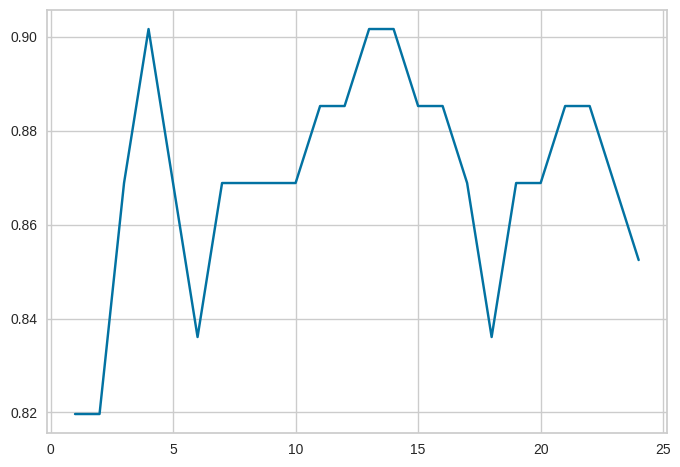

In [39]:
plt.plot(k_range,scores_list)

As observed, we achieve the highest accuracy, i.e, 90.1% using k=4

### ***6.1.2  Training the model***

In [40]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train.values, y_train.values)

KNeighborsClassifier(n_neighbors=4)

### ***6.1.3  Testing the model***

In [41]:
pred_KNN = KNN.predict(X_test)
pred_KNN

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [42]:
y_test.head()

113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64

### **6.1.4  Performance evaluation**

***Accuracy score***

In [43]:
KNNAcc = accuracy_score(y_test, pred_KNN)*100
print("The accuracy of KNN classifier is", KNNAcc,"%")

The accuracy of KNN classifier is 90.1639344262295 %


***Precision score***

In [44]:
KNNPr = precision_score(y_test, pred_KNN)*100
print("The precision of KNN classifier is", KNNPr,"%")

The precision of KNN classifier is 91.66666666666666 %


***Recall score***

In [45]:
KNNRec = recall_score(y_test, pred_KNN)*100
print("The sensitivity of KNN classifier is", KNNRec,"%")

The sensitivity of KNN classifier is 91.66666666666666 %


***F1 score***

In [46]:
KNNF1 = f1_score(y_test, pred_KNN)*100
print("The f score of KNN classifier is", KNNF1,"%")

The f score of KNN classifier is 91.66666666666666 %


***Classification report***

In [47]:
print(classification_report(y_test, pred_KNN))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.92      0.92      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



***Confusion Matrix , ROC Curve, Learning curve, Precision-Recall Curve***

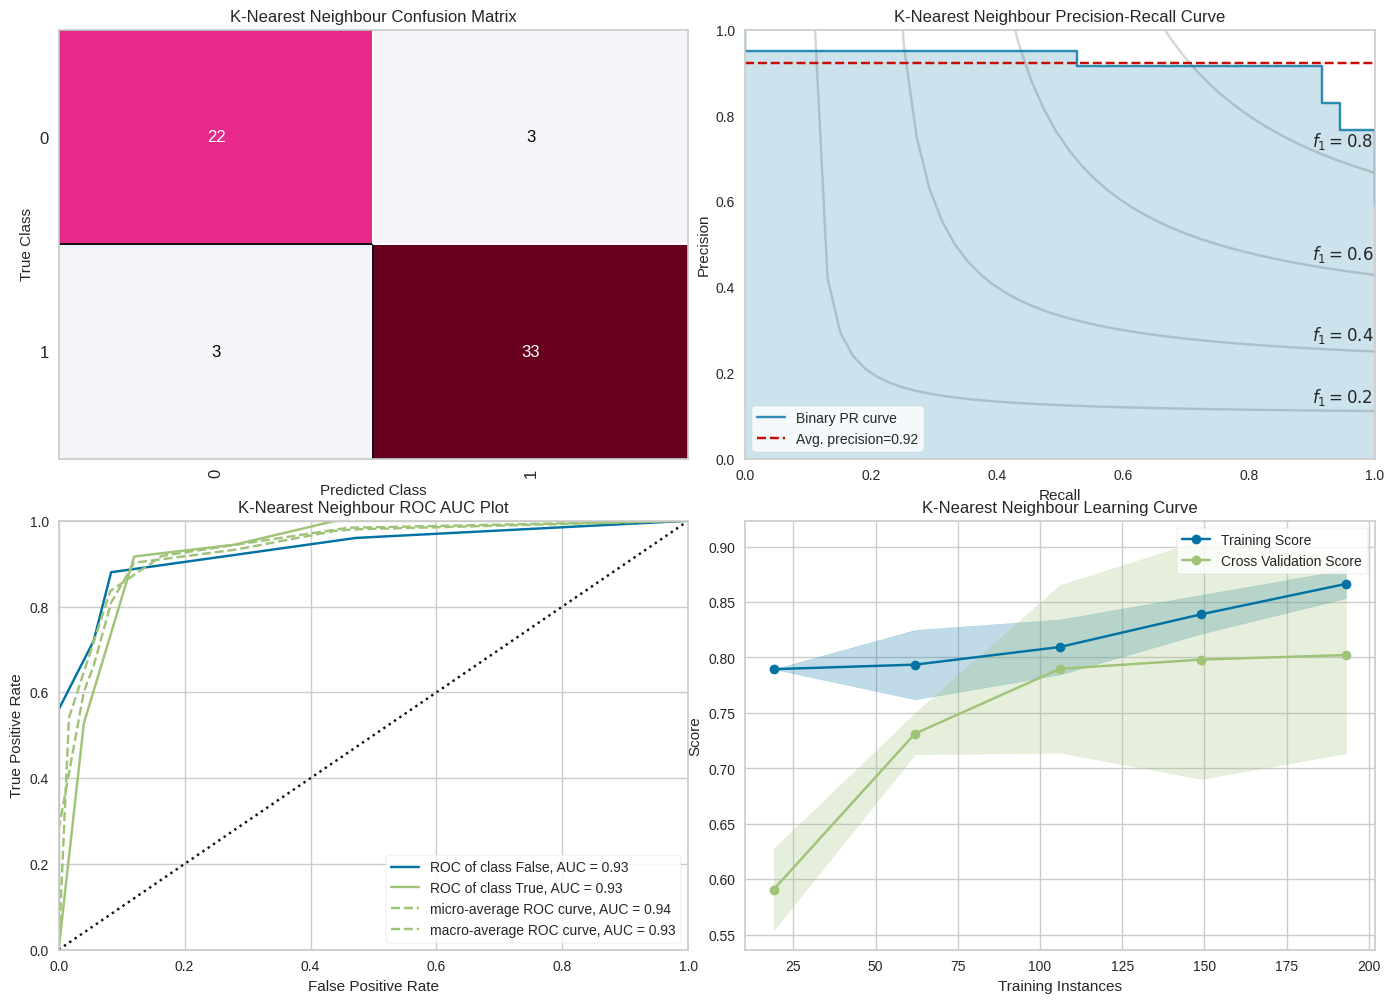

In [48]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

#Confusion matrix
knnmatrix = ConfusionMatrix(KNN, ax=ax1, cmap='PuRd', title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(X_train, y_train)
knnmatrix.score(X_test, y_test)
knnmatrix.finalize()

#Precision-Recall / F1 curve
knncurve = PrecisionRecallCurve(KNN, ax=ax2, ap_score=True, iso_f1_curves=True, title='K-Nearest Neighbour Precision-Recall Curve')
knncurve.fit(X_train, y_train)
knncurve.score(X_test, y_test)
knncurve.finalize()

#ROC curve
knnroc = ROCAUC(KNN, classes=['False', 'True'], ax=ax3, title='K-Nearest Neighbour ROC AUC Plot')
knnroc.fit(X_train, y_train)
knnroc.score(X_test, y_test)
knnroc.finalize()

#Learning curve
knnlc = LearningCurve(KNN, ax=ax4, title='K-Nearest Neighbour Learning Curve')
knnlc.fit(X_train, y_train)
knnlc.finalize()

***10-fold cross validation***

In [49]:
knn_cv = KNeighborsClassifier(n_neighbors=4)
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
knn_cv_scores= np.mean(cv_scores)*100
print("Cross validation score mean:", knn_cv_scores , "%")

Cross validation score mean: 79.52688172043011 %


## **6.2  Logistic Regression**

### ***6.2.1  Training the model***

In [50]:
LR = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LR.fit(X_train.values, y_train.values)

LogisticRegression(max_iter=1000, penalty='l1', random_state=1,
                   solver='liblinear')

### ***6.2.2  Testing the model***

In [51]:
pred_LR = LR.predict(X_test)
pred_LR

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [52]:
y_test.head()

113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64

### **6.2.3  Performance evaluation**

***Accuracy score***

In [53]:
LRAcc = accuracy_score(y_test, pred_LR)*100
print("The accuracy of Logistic regression classifier is",LRAcc,"%")

The accuracy of Logistic regression classifier is 86.88524590163934 %


***Precision score***

In [54]:
LRPr = precision_score(y_test, pred_LR)*100
print("The precision of Logistic regression classifier is",LRPr,"%")

The precision of Logistic regression classifier is 85.0 %


***Recall score***

In [55]:
LRRec = recall_score(y_test, pred_LR)*100
print("The sensitivity of Logistic regression classifier is",LRRec,"%")

The sensitivity of Logistic regression classifier is 94.44444444444444 %


***F1 score***

In [56]:
LRF1 = f1_score(y_test, pred_LR)*100
print("The f score of Logistic regression classifier is",LRF1,"%")

The f score of Logistic regression classifier is 89.47368421052632 %


***Classification report***

In [57]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.85      0.94      0.89        36

    accuracy                           0.87        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.87      0.87      0.87        61



***Confusion Matrix , ROC Curve, Learning curve, Precision-Recall Curve***

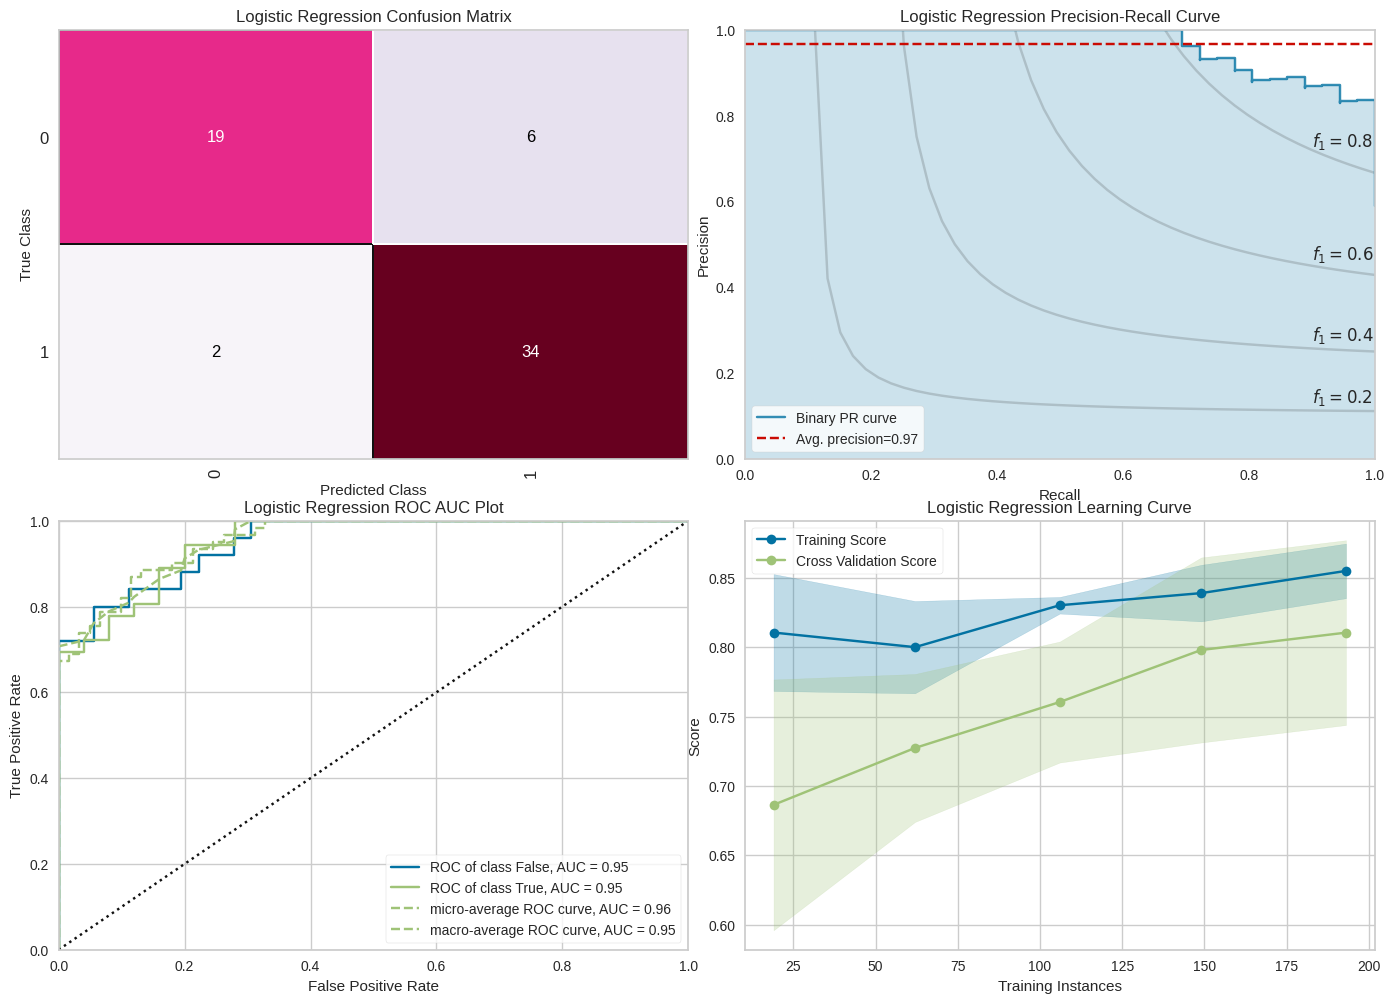

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

#Confusion matrix
logmatrix = ConfusionMatrix(LR, ax=ax1, cmap='PuRd', title='Logistic Regression Confusion Matrix')
logmatrix.fit(X_train, y_train)
logmatrix.score(X_test, y_test)
logmatrix.finalize()

#Precision-Recall / F1 curve
logcurve = PrecisionRecallCurve(LR, ax=ax2, ap_score=True, iso_f1_curves=True, title='Logistic Regression Precision-Recall Curve')
logcurve.fit(X_train, y_train)
logcurve.score(X_test, y_test)
logcurve.finalize()

#ROC curve
logroc = ROCAUC(LR, classes=['False', 'True'], ax=ax3, title='Logistic Regression ROC AUC Plot')
logroc.fit(X_train, y_train)
logroc.score(X_test, y_test)
logroc.finalize()

#Learning curve
loglc = LearningCurve(LR, ax=ax4, title='Logistic Regression Learning Curve')
loglc.fit(X_train, y_train)
loglc.finalize()

***10-fold cross validation***

In [59]:
LR_cv = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
cv_scores = cross_val_score(LR_cv, X, y, cv=10)
lr_cv_scores= np.mean(cv_scores)*100
print("Cross validation score mean:",lr_cv_scores , "%")

Cross validation score mean: 82.83870967741936 %


## **6.3  Support Vector Machine**

### ***6.3.1  Determining which kernel to use to create the hyperplane***

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

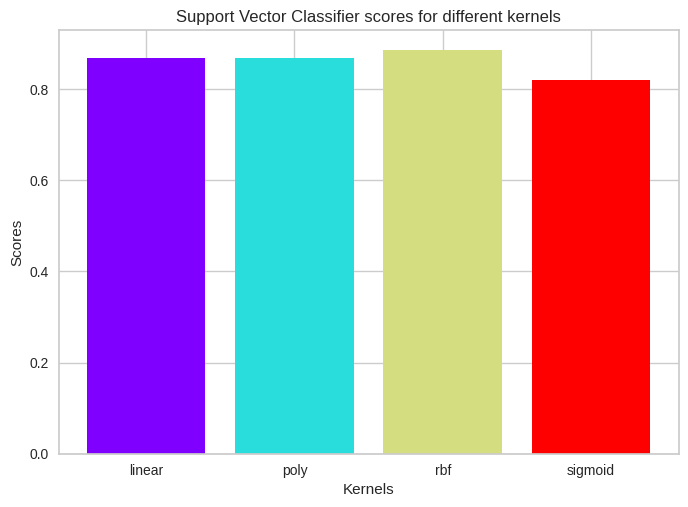

In [60]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

As observed, using rbf kernel will help us achieve the highest accuracy

### ***6.3.2  Training the model***

In [61]:
SVM = SVC(kernel='rbf', max_iter=100, C=1, probability=True)
SVM.fit(X_train.values, y_train.values)

SVC(C=1, max_iter=100, probability=True)

### ***6.3.3  Testing the model***

In [62]:
pred_SVM = SVM.predict(X_test)
pred_SVM

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [63]:
y_test.head()

113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64

### **6.3.4  Performance evaluation**

***Accuracy score***

In [64]:
SVMAcc = accuracy_score(y_test, pred_SVM)*100
print("The accuracy of Support Vector Machine classifier is",SVMAcc,"%")

The accuracy of Support Vector Machine classifier is 88.52459016393442 %


***Precision score***

In [65]:
SVMPr = precision_score(y_test, pred_SVM)*100
print("The precision of Support Vector Machine classifier is",SVMPr,"%")

The precision of Support Vector Machine classifier is 85.36585365853658 %


***Recall score***

In [66]:
SVMRec = recall_score(y_test, pred_SVM)*100
print("The sensitivity of Support Vector Machine classifier is",SVMRec,"%")

The sensitivity of Support Vector Machine classifier is 97.22222222222221 %


***F1 score***

In [67]:
SVMF1 = f1_score(y_test, pred_SVM)*100
print("The f score of Support Vector Machine classifier is",SVMF1,"%")

The f score of Support Vector Machine classifier is 90.9090909090909 %


***Classification report***

In [68]:
print(classification_report(y_test, pred_SVM))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.85      0.97      0.91        36

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



 ***Confusion Matrix , ROC Curve, Learning curve, Precision-Recall Curve*** 

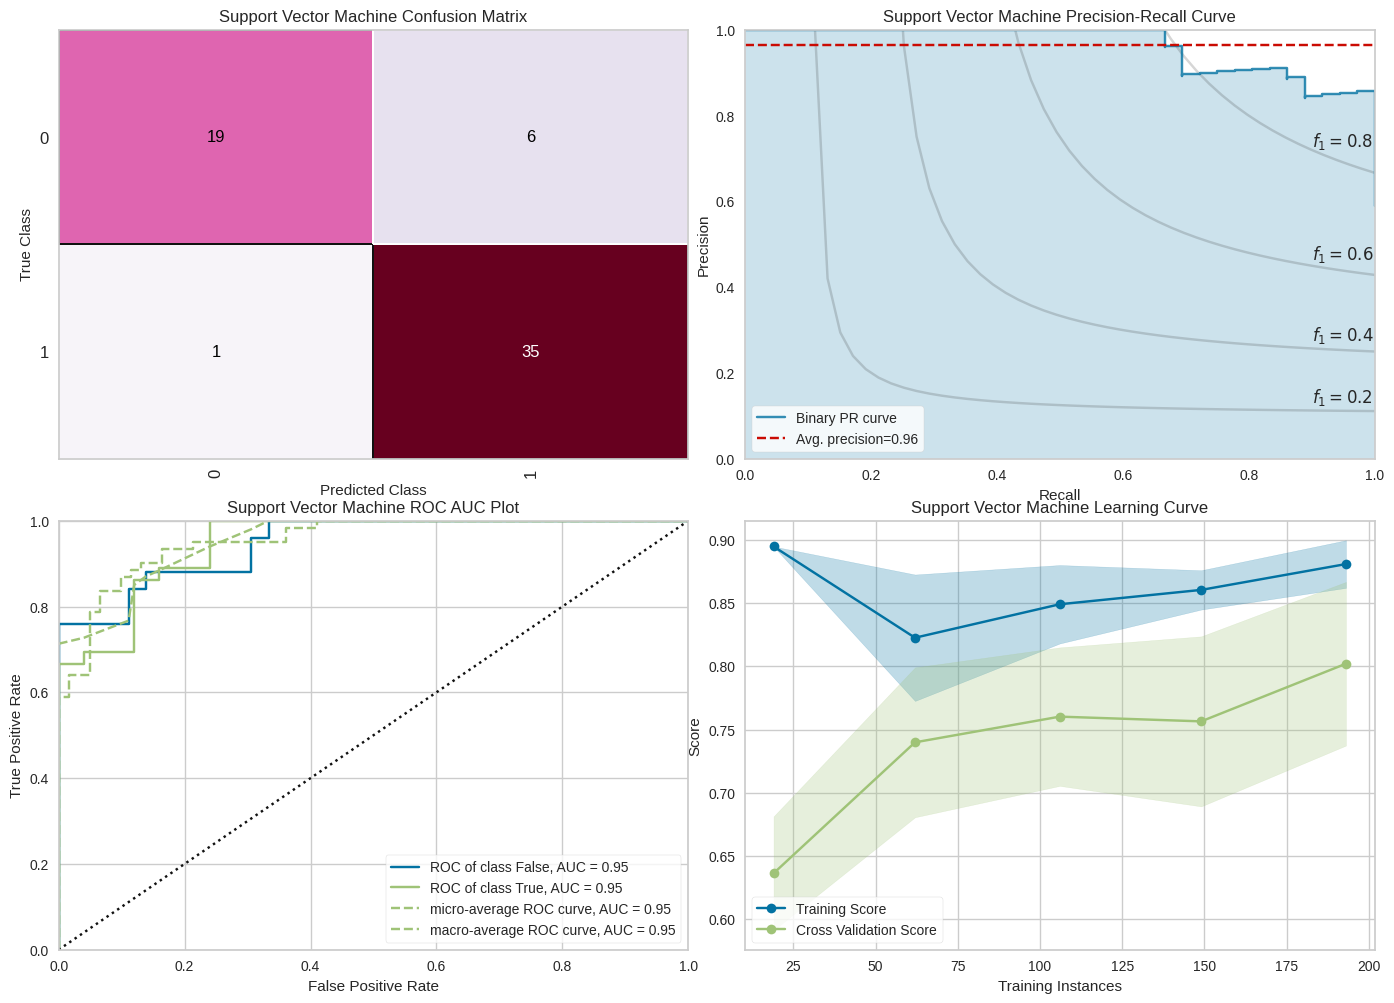

In [69]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

#Confusion matrix
svmmatrix = ConfusionMatrix(SVM, ax=ax1, cmap='PuRd', title='Support Vector Machine Confusion Matrix')
svmmatrix.fit(X_train, y_train)
svmmatrix.score(X_test, y_test)
svmmatrix.finalize()

#Precision-Recall / F1 curve
svmcurve = PrecisionRecallCurve(SVM, ax=ax2, ap_score=True, iso_f1_curves=True, title='Support Vector Machine Precision-Recall Curve')
svmcurve.fit(X_train, y_train)
svmcurve.score(X_test, y_test)
svmcurve.finalize()

#ROC curve
svmroc = ROCAUC(SVM, classes=['False', 'True'], ax=ax3, title='Support Vector Machine ROC AUC Plot')
svmroc.fit(X_train, y_train)
svmroc.score(X_test, y_test)
svmroc.finalize()

#Learning curve
svmlc = LearningCurve(SVM, ax=ax4, title='Support Vector Machine Learning Curve')
svmlc.fit(X_train, y_train)
svmlc.finalize()

***10-fold cross validation***

In [70]:
SVM_cv = SVC(kernel='rbf', max_iter=100, C=1, probability=True)
cv_scores = cross_val_score(SVM_cv, X, y, cv=10)
svm_cv_scores= np.mean(cv_scores)*100
print("Cross validation score mean:",svm_cv_scores, "%")

Cross validation score mean: 81.48387096774194 %


## **6.4  Random Forest Classifier**

### ***6.4.1  Determining how many estimators to use***

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

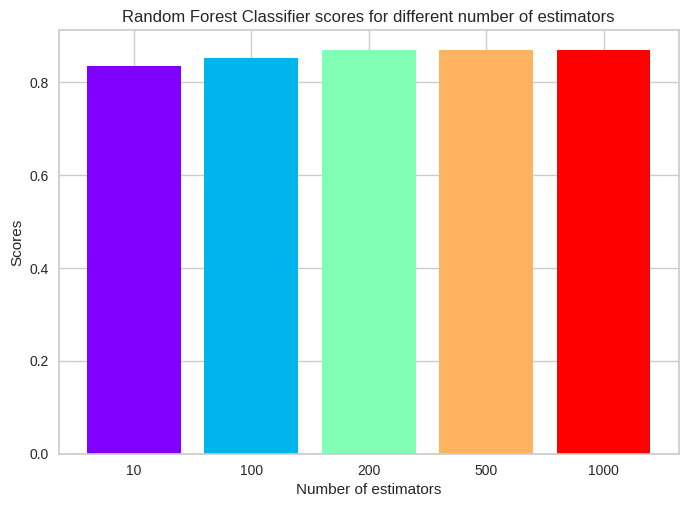

In [71]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
#for i in range(len(estimators)):
    #plt.text(i, rf_scores[i], rf_scores[i]*100)
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

As its seen, we can use either 200, 500 or 1000 estimators to get an accurate result.

### ***6.4.2  Training the model***

In [72]:
RF = RandomForestClassifier(n_estimators=1000, random_state=50, max_leaf_nodes=15, min_samples_split=15)
RF.fit(X_train.values, y_train.values)

RandomForestClassifier(max_leaf_nodes=15, min_samples_split=15,
                       n_estimators=1000, random_state=50)

### ***6.4.3  Testing the model***

In [73]:
pred_RF = RF.predict(X_test)
pred_RF

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [74]:
y_test.head()

113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64

### **6.4.4  Performance evaluation**

***Accuracy score***

In [75]:
RFAcc = accuracy_score(y_test, pred_RF)*100
print("The accuracy of Random Forest classifier is",RFAcc,"%")

The accuracy of Random Forest classifier is 85.24590163934425 %


***Precision score***

In [76]:
RFPr = precision_score(y_test, pred_RF)*100
print("The precision of Random Forest classifier is",RFPr,"%")

The precision of Random Forest classifier is 82.92682926829268 %


***Recall score***

In [77]:
RFRec = recall_score(y_test, pred_RF)*100
print("The sensitivity of Random Forest classifier is",RFRec,"%")

The sensitivity of Random Forest classifier is 94.44444444444444 %


***F1 score***

In [78]:
RFF1 = f1_score(y_test, pred_RF)*100
print("The f score of Random Forest classifier is",RFF1,"%")

The f score of Random Forest classifier is 88.3116883116883 %


***Classification report***

In [79]:
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.83      0.94      0.88        36

    accuracy                           0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.86      0.85      0.85        61



***Confusion Matrix , ROC Curve, Learning curve, Precision-Recall Curve***

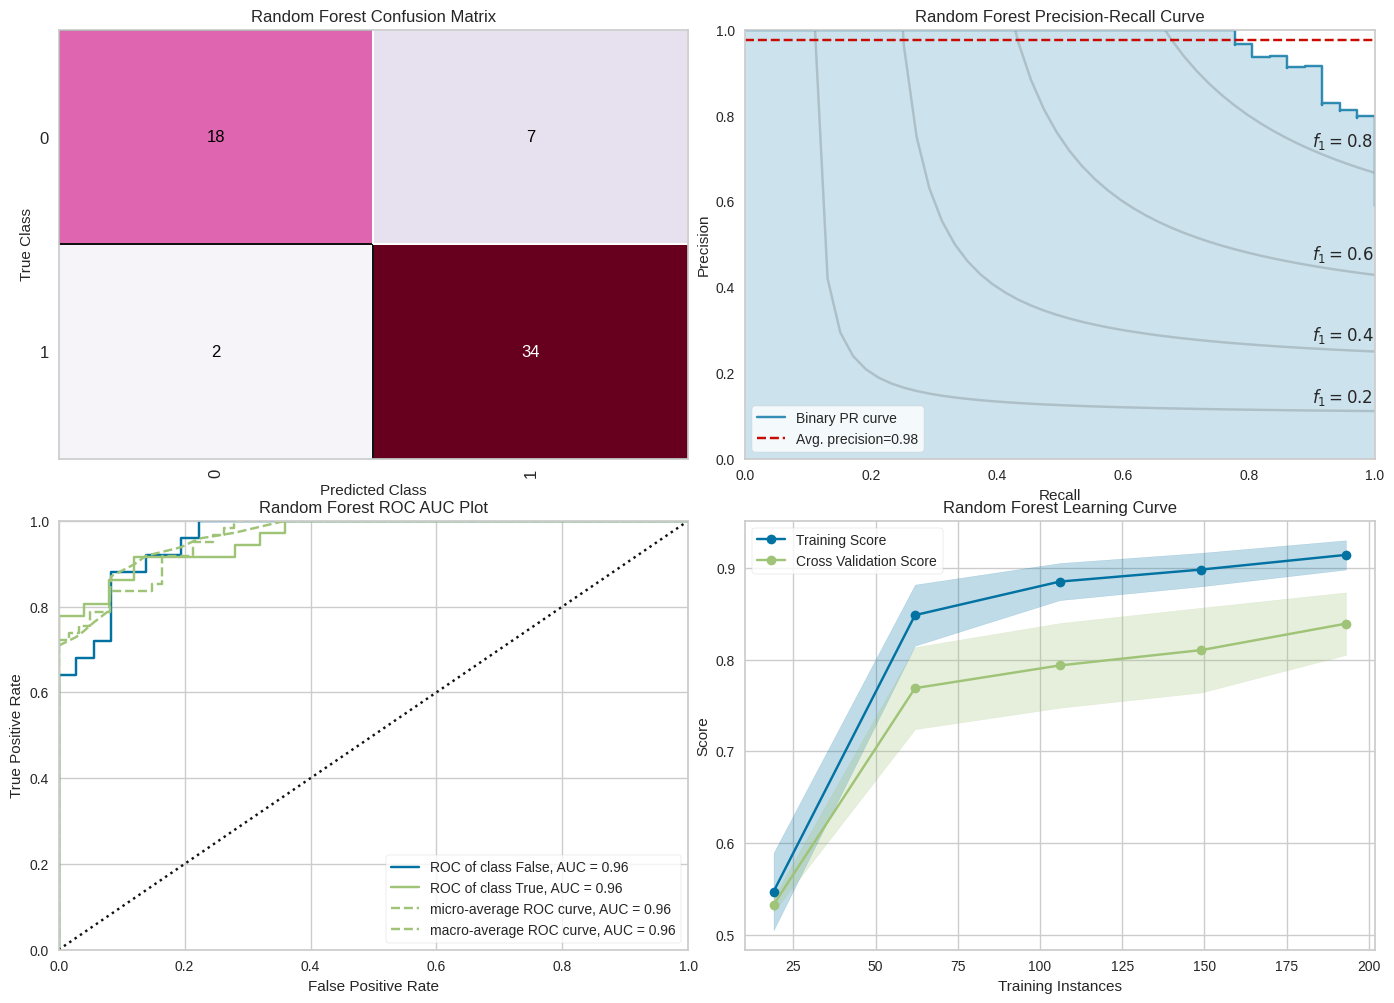

In [80]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

#Confusion Matrix
rfcmatrix = ConfusionMatrix(RF, ax=ax1, cmap='PuRd', title='Random Forest Confusion Matrix')
rfcmatrix.fit(X_train, y_train)
rfcmatrix.score(X_test, y_test)
rfcmatrix.finalize()

#Precision-Recall / F1 curve
rcccurve = PrecisionRecallCurve(RF, ax=ax2, ap_score=True, iso_f1_curves=True, title='Random Forest Precision-Recall Curve')
rcccurve.fit(X_train, y_train)
rcccurve.score(X_test, y_test)
rcccurve.finalize()

#ROC curve
rccroc = ROCAUC(RF, classes=['False', 'True'], ax=ax3, title='Random Forest ROC AUC Plot')
rccroc.fit(X_train, y_train)
rccroc.score(X_test, y_test)
rccroc.finalize()

#Learning curve
rcclc = LearningCurve(RF, ax=ax4, title='Random Forest Learning Curve')
rcclc.fit(X_train, y_train)
rcclc.finalize()

***10-fold cross validation***

In [81]:
RF_cv = RandomForestClassifier(n_estimators=1000, random_state=50, max_leaf_nodes=15, min_samples_split=15)
cv_scores = cross_val_score(RF_cv, X, y, cv=10)
rf_cv_scores= np.mean(cv_scores)*100
print("Cross validation score mean:", rf_cv_scores, "%")

Cross validation score mean: 84.47311827956989 %


# **Step 7:  Model Comparison**

In [82]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 'Random Forest'],
                        'Accuracy': [LRAcc, KNNAcc, SVMAcc, RFAcc],
                        'Precision': [LRPr, KNNPr, SVMPr, RFPr],
                        'Recall': [LRRec, KNNRec, SVMRec, RFRec],
                        'F1-score': [LRF1, KNNF1, SVMF1, RFF1],
                        'Cross Validation score': [lr_cv_scores, knn_cv_scores, svm_cv_scores, rf_cv_scores],
                        'ROC AUC': [0.89, 0.94, 0.96, 0.96]
                      })

compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy,Precision,Recall,F1-score,Cross Validation score,ROC AUC
K-Nearest Neighbour,90.163934,91.666667,91.666667,91.666667,79.526882,0.940000
Support Vector Machine,88.524590,85.365854,97.222222,90.909091,81.483871,0.960000
Logistic Regression,86.885246,85.000000,94.444444,89.473684,82.838710,0.890000
Random Forest,85.245902,82.926829,94.444444,88.311688,84.473118,0.960000


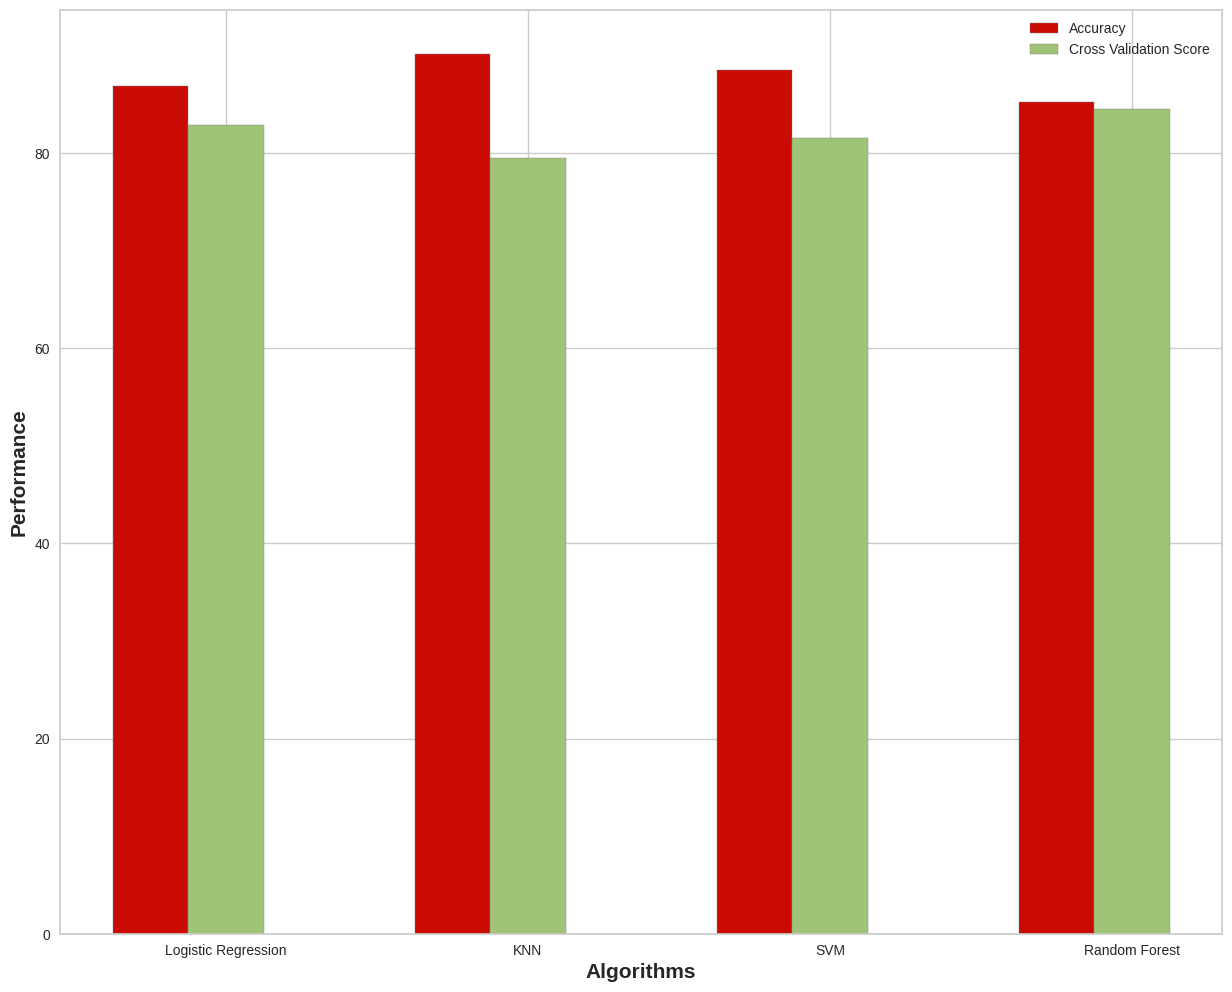

In [83]:
barWidth = 0.25
fig = plt.subplots(figsize =(15, 12))
 
# set height of bar
Accuracy= [LRAcc, KNNAcc, SVMAcc, RFAcc]
Cross_Validation_score = [lr_cv_scores, knn_cv_scores, svm_cv_scores, rf_cv_scores]

# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, Accuracy, color ='r', width = barWidth, edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Cross_Validation_score, color ='g', width = barWidth, edgecolor ='grey', label ='Cross Validation Score')


# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 15)
plt.ylabel('Performance', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        ['Logistic Regression', 'KNN', 'SVM', 'Random Forest'])

plt.legend()
plt.show()

# **Step 8:  Selecting Best Model using GridSearchCV**

In [84]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'max_iter' : [1000],
                'solver' : ['liblinear']
            }
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors' : [4]
            }
        },
        'SVM': {
            'model': SVC(),
            'params': {
                'kernel' : ['rbf'], 
                'max_iter' : [100], 
                'C': [1],
                'probability': [True]
            }
        },
        'Random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [1000], 
                'random_state': [50],
                'max_leaf_nodes': [15], 
                'min_samples_split': [15]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,logistic_regression,0.859016,"{'max_iter': 1000, 'solver': 'liblinear'}"
1,KNN,0.818033,{'n_neighbors': 4}
2,SVM,0.831148,"{'C': 1, 'kernel': 'rbf', 'max_iter': 100, 'pr..."
3,Random_forest,0.854098,"{'max_leaf_nodes': 15, 'min_samples_split': 15..."


In [85]:
X.columns

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'sex_0', 'sex_1',
       'exng_0', 'exng_1', 'caa_0', 'caa_1', 'caa_2', 'caa_3', 'caa_4', 'cp_0',
       'cp_1', 'cp_2', 'cp_3', 'slp_0', 'slp_1', 'slp_2'],
      dtype='object')

So as observed Logistic regression is the best model that can be used for our research as it has the highest score.

# **Step 9:  Exporting the Selected Model to a Pickle File**

In [86]:
import pickle
with open('heart_disease_model.pickle','wb') as f:
    pickle.dump(LR,f)

# **Step 10:  Exporting the Attribute Columns to a JSON File**

In [87]:
import json
columns = {
    'data_columns' : [col.upper() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [88]:
data = [[0.227, 0.786, 0.964, 0.681, 0.669, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]]

#using KNN classifier
result = LR.predict(data)

if result == 0:
  print('Heart Disease Detected!')
else:
  print('Heart Disease Not Detected!')

Heart Disease Detected!


In [89]:
data = [[0.583, 0.433, 0.262, 0.396, 0.032, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]]

#using KNN classifier
result = LR.predict(data)

if result == 0:
  print('Heart Disease Detected!')
else:
  print('Heart Disease Not Detected!')

Heart Disease Not Detected!


In [90]:
data = [[0.583, 0.433, 0.262, 0.396, 0.032, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]]

#using KNN classifier
result = LR.predict(data)

if result == 0:
  print('Heart Disease Detected!')
else:
  print('Heart Disease Not Detected!')

Heart Disease Not Detected!
